# Table of contents
1. [Cleaning](#cleaning)
2. [Exploring to Answer Unasked Questions (EDA)](#myanswers)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from datetime import datetime

## Cleaning the Dataframe <a name="cleaning"></a>

In [2]:
df = pd.read_csv("daily-inmates-in-custody.csv")
df.head().T

,0,1,2,3,4
INMATEID,20159382,20120917,20174220,20174619,20175929
ADMITTED_DT,2015-11-14T18:22:02,2013-10-11T18:34:33,2016-10-25T16:33:35,2016-11-03T18:11:30,2016-12-09T02:20:21
DISCHARGED_DT,NaN,NaN,NaN,NaN,NaN
CUSTODY_LEVEL,NaN,NaN,NaN,NaN,NaN
BRADH,N,N,N,N,N
RACE,NaN,NaN,NaN,NaN,NaN
GENDER,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,NaN
INMATE_STATUS_CODE,DE,DE,DE,DE,DE
SEALED,N,N,N,N,N


In [3]:
original_colnames = df.columns
new_colnames = ['INMATE_ID', 'ADMITTED_DT', 'DISCHARGED_DT', 'CUSTODY_LEVEL', 'MENTAL_OBSERVATION', 'RACE', 'GENDER', 'AGE', 'INMATE_STATUS_CODE', 'SEALED', 'GANG_AFFILIATION', 'TOP_CHARGE', 'INFRACTION']
df = df.rename(columns=dict(zip(original_colnames, new_colnames)))
df.head().T

,0,1,2,3,4
INMATE_ID,20159382,20120917,20174220,20174619,20175929
ADMITTED_DT,2015-11-14T18:22:02,2013-10-11T18:34:33,2016-10-25T16:33:35,2016-11-03T18:11:30,2016-12-09T02:20:21
DISCHARGED_DT,NaN,NaN,NaN,NaN,NaN
CUSTODY_LEVEL,NaN,NaN,NaN,NaN,NaN
MENTAL_OBSERVATION,N,N,N,N,N
RACE,NaN,NaN,NaN,NaN,NaN
GENDER,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,NaN
INMATE_STATUS_CODE,DE,DE,DE,DE,DE
SEALED,N,N,N,N,N


In [4]:
df.tail().T

,8223,8224,8225,8226,8227
INMATE_ID,20101081,80499,168995,20197793,20185441
ADMITTED_DT,2018-08-27T12:43:45,2018-08-26T01:16:28,2018-08-27T13:46:28,2018-08-24T20:59:00,2018-06-27T19:18:55
DISCHARGED_DT,NaN,NaN,NaN,NaN,NaN
CUSTODY_LEVEL,MED,MIN,MED,MIN,MAX
MENTAL_OBSERVATION,N,N,N,N,Y
RACE,O,B,O,W,O
GENDER,M,M,M,F,M
AGE,48,51,30,42,21
INMATE_STATUS_CODE,DE,DE,DE,DE,DE
SEALED,N,N,N,N,N


It looks like a lot of the inmates have not been released yet. Also, the older the data is, the less complete it is. Race, gender, age, and top charge are values that are missing from the oldest records. We can also see from the head of the dataframe that the dataframe is not in chronological order.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8228 entries, 0 to 8227
Data columns (total 13 columns):
INMATE_ID             8228 non-null int64
ADMITTED_DT           8228 non-null object
DISCHARGED_DT         0 non-null float64
CUSTODY_LEVEL         8107 non-null object
MENTAL_OBSERVATION    8228 non-null object
RACE                  8206 non-null object
GENDER                8206 non-null object
AGE                   8218 non-null float64
INMATE_STATUS_CODE    8228 non-null object
SEALED                8228 non-null object
GANG_AFFILIATION      8228 non-null object
TOP_CHARGE            7294 non-null object
INFRACTION            8228 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 835.7+ KB


We will check to see if all of the files of the inmates are sealed since that is what the head and tail of the dataframe seem to indicate.

In [6]:
sealed = df['SEALED'].dropna()
sealed = sealed.map({'Y' :0, 'N' :1})
sum(sealed)/len(sealed)

1.0

This shows that 100% of the values for the SEALED column are 'N' for no. Since they are all consistent, we will remove the column from the dataframe. It will have no bearing on our results unless and until the results can be compared with results where the inmates' records are sealed.

We will also remove the column DISCHARGED_DT from the dataframe as all of those values are NaN.

In [7]:
df = df.drop(['DISCHARGED_DT', 'SEALED'],axis=1)

In [8]:
df.head()

,INMATE_ID,ADMITTED_DT,CUSTODY_LEVEL,MENTAL_OBSERVATION,RACE,GENDER,AGE,INMATE_STATUS_CODE,GANG_AFFILIATION,TOP_CHARGE,INFRACTION
0,20159382,2015-11-14T18:22:02,NaN,N,NaN,NaN,NaN,DE,N,NaN,N
1,20120917,2013-10-11T18:34:33,NaN,N,NaN,NaN,NaN,DE,N,NaN,N
2,20174220,2016-10-25T16:33:35,NaN,N,NaN,NaN,NaN,DE,N,NaN,N
3,20174619,2016-11-03T18:11:30,NaN,N,NaN,NaN,NaN,DE,N,NaN,N
4,20175929,2016-12-09T02:20:21,NaN,N,NaN,NaN,NaN,DE,N,NaN,N


According to cell 5, there are more than 100 missing values from TOP_CHARGE and CUSTODY_LEVEL. However there are only 22 missing from RACE and GENDER and less missing from AGE. Since that is less than 0.2% of overall data, we will drop the rows where there are any NaN values in RACE and GENDER. We will delete the rows that have missing values from CUSTODY_LEVEL as well (less than 1.5% of total data). We will save guessing the values of top charges for more accurate machine learning than imputation. There are 121 custody level values missing. There are 934 top charge values missing.

In [9]:
df = df.dropna(axis=0, how='any', subset=['CUSTODY_LEVEL']) 

In [10]:
df.head().T

,6,7,8,9,10
INMATE_ID,56220,99982,110074,20146640,20183607
ADMITTED_DT,2017-04-04T13:05:26,2017-08-21T12:37:51,2017-06-02T20:47:27,2017-08-01T11:45:11,2017-06-18T12:05:26
CUSTODY_LEVEL,MIN,MED,MAX,MAX,MIN
MENTAL_OBSERVATION,Y,Y,N,Y,Y
RACE,B,O,O,B,B
GENDER,M,M,M,M,M
AGE,42,59,38,20,63
INMATE_STATUS_CODE,DE,DE,DE,DE,DE
GANG_AFFILIATION,N,N,N,Y,N
TOP_CHARGE,120.05,130.50,110-125.25,160.10,120.10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8107 entries, 6 to 8227
Data columns (total 11 columns):
INMATE_ID             8107 non-null int64
ADMITTED_DT           8107 non-null object
CUSTODY_LEVEL         8107 non-null object
MENTAL_OBSERVATION    8107 non-null object
RACE                  8095 non-null object
GENDER                8095 non-null object
AGE                   8107 non-null float64
INMATE_STATUS_CODE    8107 non-null object
GANG_AFFILIATION      8107 non-null object
TOP_CHARGE            7232 non-null object
INFRACTION            8107 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 760.0+ KB


We can see that dropping the rows with any NaN values in the CUSTODY_LEVEL column also dropped some rows with NaN values in the RACE, GENDER, and AGE columns. We will drop the remaining 12 in RACE and GENDER.

In [12]:
df = df.dropna(axis=0, how='any', subset=['RACE', 'GENDER']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8095 entries, 6 to 8227
Data columns (total 11 columns):
INMATE_ID             8095 non-null int64
ADMITTED_DT           8095 non-null object
CUSTODY_LEVEL         8095 non-null object
MENTAL_OBSERVATION    8095 non-null object
RACE                  8095 non-null object
GENDER                8095 non-null object
AGE                   8095 non-null float64
INMATE_STATUS_CODE    8095 non-null object
GANG_AFFILIATION      8095 non-null object
TOP_CHARGE            7222 non-null object
INFRACTION            8095 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 758.9+ KB


Now all columns have the same number of values except for TOP_CHARGE which we will leave be until we reach the machine learning portion of this project. The total percentage of dropped values is 1.6%. Leaving us with 98.4% of our original dataframe. Now we will break the ADMITTED_DT into column for year, month, and day.

In [13]:
df['YEAR'] = df['ADMITTED_DT'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').year)
df['MONTH'] = df['ADMITTED_DT'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').month)
df['DAY'] = df['ADMITTED_DT'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').day)
df['HOUR'] = df['ADMITTED_DT'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').hour)

In [14]:
df.head().T

,6,7,8,9,10
INMATE_ID,56220,99982,110074,20146640,20183607
ADMITTED_DT,2017-04-04T13:05:26,2017-08-21T12:37:51,2017-06-02T20:47:27,2017-08-01T11:45:11,2017-06-18T12:05:26
CUSTODY_LEVEL,MIN,MED,MAX,MAX,MIN
MENTAL_OBSERVATION,Y,Y,N,Y,Y
RACE,B,O,O,B,B
GENDER,M,M,M,M,M
AGE,42,59,38,20,63
INMATE_STATUS_CODE,DE,DE,DE,DE,DE
GANG_AFFILIATION,N,N,N,Y,N
TOP_CHARGE,120.05,130.50,110-125.25,160.10,120.10


In [15]:
df = df.drop(['ADMITTED_DT'],axis=1)

## Exploratory Data Analysis (EDA) <a name="myanswers"></a>

Let's see some graphs to explore the data.

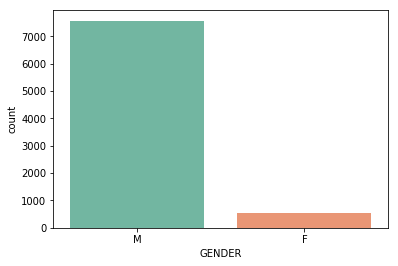

In [49]:
sns.countplot(x = "GENDER", data = df, palette="Set2")

In [17]:
female = df[df.GENDER == 'F']
male = df[df.GENDER == 'M'] 
female, male

(      INMATE_ID CUSTODY_LEVEL MENTAL_OBSERVATION RACE GENDER   AGE  \
 21     20164663           MED                  Y    B      F  26.0   
 50     20178702           MED                  Y    B      F  24.0   
 131    20168420           MED                  Y    B      F  57.0   
 156    20187452           MIN                  Y    B      F  45.0   
 174    20181480           MED                  N    O      F  44.0   
 203       96010           MAX                  Y    O      F  30.0   
 221    20158122           MED                  Y    B      F  23.0   
 224    20189924           MIN                  N    W      F  56.0   
 282    20188210           MIN                  Y    W      F  48.0   
 284    20182758           MIN                  Y    B      F  27.0   
 363      142345           MAX                  Y    W      F  34.0   
 366    20051772           MIN                  N    O      F  40.0   
 390    20183323           MIN                  Y    W      F  37.0   
 424  

In [18]:
ratio = male.count()/female.count()
ratio

INMATE_ID             14.448473
CUSTODY_LEVEL         14.448473
MENTAL_OBSERVATION    14.448473
RACE                  14.448473
GENDER                14.448473
AGE                   14.448473
INMATE_STATUS_CODE    14.448473
GANG_AFFILIATION      14.448473
TOP_CHARGE            15.156600
INFRACTION            14.448473
YEAR                  14.448473
MONTH                 14.448473
DAY                   14.448473
HOUR                  14.448473
dtype: float64

There are 14.45 times as many incarcertaed men as there are women. The outlier in the ratio for top charge is explained by more men's charges being recorded and more women's charges not being recorded in the provided dataset. We will see if the absence of recording occurred in the same month in the same year for both genders later. First let us compare the incarceration of males and females in a more proportioned graph.

Text(0.5,1,'Number of Male Prisoners Under Mental Observation')

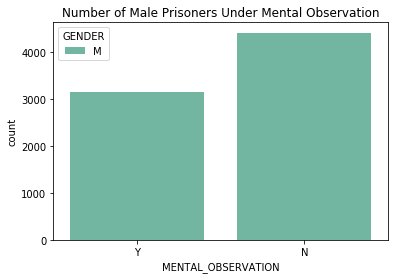

In [72]:
sns.countplot(x = 'MENTAL_OBSERVATION', hue = 'GENDER', data = male, palette="Set2")
plt.title('Number of Male Prisoners Under Mental Observation')

Text(0.5,1,'Number of Female Prisoners Under Mental Observation')

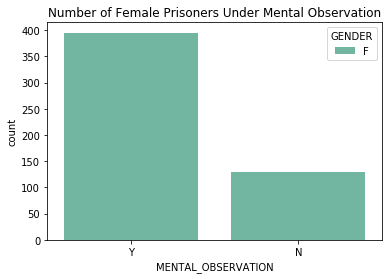

In [74]:
sns.countplot(x = 'MENTAL_OBSERVATION', hue = 'GENDER', data = female, palette="Set2")
plt.title('Number of Female Prisoners Under Mental Observation')

Text(0.5,1,'Number of Male Prisoners with Gang Affiliations')

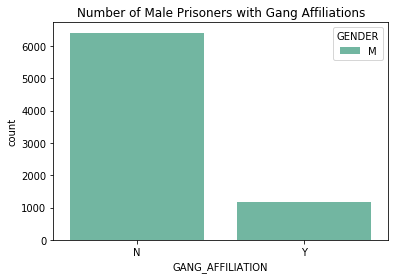

In [76]:
sns.countplot(x = 'GANG_AFFILIATION', hue = 'GENDER', data = male, palette="Set2")
plt.title('Number of Male Prisoners with Gang Affiliations')

Text(0.5,1,'Number of Female Prisoners with Gang Affiliations')

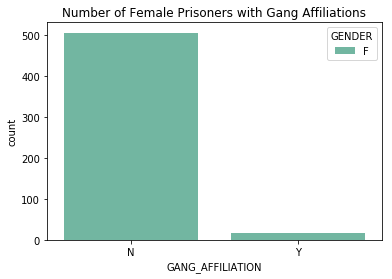

In [77]:
sns.countplot(x = 'GANG_AFFILIATION', hue = 'GENDER', data = female, palette="Set2")
plt.title('Number of Female Prisoners with Gang Affiliations')

Thankfully there does not seem to be a great amount of relative gang affiliation among the inmates. We expected to see higher numbers but we are happily wrong. We are hoping that means that gang life is not proliferant in the City of New York instead of taking the low numbers to mean that a good number of gang members have not caught or incarcerated yet. It could be that the gang members are committing no crime to be arrested for or that they are very good at not getting caught. We will leave that to the appropriate departments and experts to decide.

Text(0.5,1,'Level of Security of Prisoners by Gender')

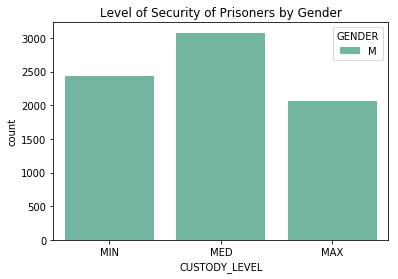

In [50]:
sns.countplot(x = 'CUSTODY_LEVEL', hue = 'GENDER', data = male, palette="Set2")
plt.title('Level of Security of Male PrisonerS')

Text(0.5,1,'Level of Security of Prisoners by Gender')

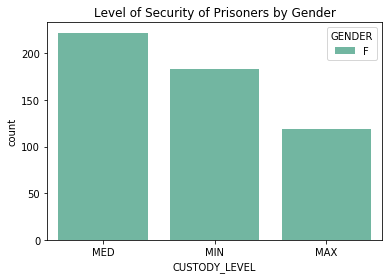

In [62]:
sns.countplot(x = 'CUSTODY_LEVEL', hue = 'GENDER', data = female, palette="Set2", order = df['CUSTODY_LEVEL'].value_counts().index)
plt.title('Level of Security of Prisoners by Gender')

We can see that the highest proportion of men and women are at medium security custody level and that the least proportion is in maximum security. That holds true for both genders. Now we will see if the absence of recording top charges in the records occurred in the same month in the same year for both genders.

In [21]:
df1 = df[df.isnull().any(axis=1)]
df1, df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 17 to 8219
Data columns (total 14 columns):
INMATE_ID             873 non-null int64
CUSTODY_LEVEL         873 non-null object
MENTAL_OBSERVATION    873 non-null object
RACE                  873 non-null object
GENDER                873 non-null object
AGE                   873 non-null float64
INMATE_STATUS_CODE    873 non-null object
GANG_AFFILIATION      873 non-null object
TOP_CHARGE            0 non-null object
INFRACTION            873 non-null object
YEAR                  873 non-null int64
MONTH                 873 non-null int64
DAY                   873 non-null int64
HOUR                  873 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 102.3+ KB


(      INMATE_ID CUSTODY_LEVEL MENTAL_OBSERVATION RACE GENDER   AGE  \
 17     20129249           MIN                  N    O      M  28.0   
 57     20128576           MIN                  N    B      M  62.0   
 58       171020           MIN                  N    O      M  46.0   
 63       131514           MIN                  N    W      M  46.0   
 158      116457           MAX                  N    B      M  36.0   
 174    20181480           MED                  N    O      F  44.0   
 196    20178828           MIN                  N    B      M  19.0   
 274    20026314           MIN                  N    B      M  27.0   
 332    20154667           MIN                  N    B      M  30.0   
 343      100687           MIN                  N    B      M  36.0   
 368       89889           MIN                  N    B      M  45.0   
 390    20183323           MIN                  Y    W      F  37.0   
 433      117067           MIN                  N    B      M  54.0   
 480  

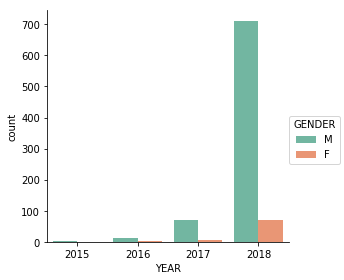

In [52]:
sns.factorplot(x="YEAR", hue="GENDER", data=df1, kind="count", order=np.arange(2015,2019), palette="Set2")

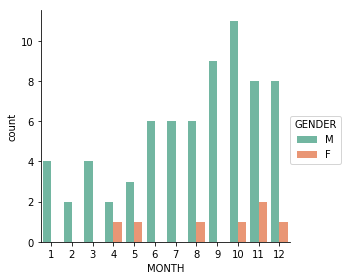

In [53]:
sns.factorplot(x="MONTH", hue="GENDER", data=df1[df1['YEAR']==2017], kind="count", order=np.arange(1,13), palette="Set2")

The second graph shows us that the absence of records is not occuring at the same time between the genders. As a side note, the disparity between the two genders as presented in the second graph is startling. Let us see if the proportions are the same at least among the years.

In [24]:
df2 = df.dropna(axis=0, how='any', subset=['TOP_CHARGE']) 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7222 entries, 6 to 8227
Data columns (total 14 columns):
INMATE_ID             7222 non-null int64
CUSTODY_LEVEL         7222 non-null object
MENTAL_OBSERVATION    7222 non-null object
RACE                  7222 non-null object
GENDER                7222 non-null object
AGE                   7222 non-null float64
INMATE_STATUS_CODE    7222 non-null object
GANG_AFFILIATION      7222 non-null object
TOP_CHARGE            7222 non-null object
INFRACTION            7222 non-null object
YEAR                  7222 non-null int64
MONTH                 7222 non-null int64
DAY                   7222 non-null int64
HOUR                  7222 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 846.3+ KB


In [25]:
female_tc = df2[df2.GENDER == 'F']
male_tc = df2[df2.GENDER == 'M'] 

In [26]:
female_ntc = df1[df1.GENDER == 'F']
male_ntc = df1[df1.GENDER == 'M'] 

In [27]:
female_tc_2015 = female_tc[female_tc.YEAR == 2015]
male_tc_2015 = male_tc[male_tc.YEAR == 2015]
female_ntc_2015 = female_ntc[female_ntc.YEAR == 2015]
male_ntc_2015 = male_ntc[male_ntc.YEAR == 2015]
ratio_tc2ntc_males_15 = male_tc_2015.GENDER.count()/male_ntc_2015.GENDER.count()
ratio_tc2ntc_females_15 = female_tc_2015.GENDER.count()/female_ntc_2015.GENDER.count()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  


In [28]:
female_tc_2016 = female_tc[female_tc.YEAR == 2016]
male_tc_2016 = male_tc[male_tc.YEAR == 2016]
female_ntc_2016 = female_ntc[female_ntc.YEAR == 2016]
male_ntc_2016 = male_ntc[male_ntc.YEAR == 2016]
ratio_tc2ntc_males_16 = male_tc_2016.GENDER.count()/male_ntc_2016.GENDER.count()
ratio_tc2ntc_females_16 = female_tc_2016.GENDER.count()/female_ntc_2016.GENDER.count()

In [29]:
female_tc_2017 = female_tc[female_tc.YEAR == 2017]
male_tc_2017 = male_tc[male_tc.YEAR == 2017]
female_ntc_2017 = female_ntc[female_ntc.YEAR == 2017]
male_ntc_2017 = male_ntc[male_ntc.YEAR == 2017]
ratio_tc2ntc_males_17 = male_tc_2017.GENDER.count()/male_ntc_2017.GENDER.count()
ratio_tc2ntc_females_17 = female_tc_2017.GENDER.count()/female_ntc_2017.GENDER.count()

In [30]:
female_tc_2018 = female_tc[female_tc.YEAR == 2018]
male_tc_2018 = male_tc[male_tc.YEAR == 2018]
female_ntc_2018 = female_ntc[female_ntc.YEAR == 2018]
male_ntc_2018 = male_ntc[male_ntc.YEAR == 2018]
ratio_tc2ntc_males_18 = male_tc_2018.GENDER.count()/male_ntc_2018.GENDER.count()
ratio_tc2ntc_females_18 = female_tc_2018.GENDER.count()/female_ntc_2018.GENDER.count()

In [31]:
print("2015 males: ", ratio_tc2ntc_males_15, "2015 females: ", ratio_tc2ntc_females_15)

2015 males:  22.666666666666668 2015 females:  inf


In [32]:
print("2016 males: ", ratio_tc2ntc_males_16, "2016 females: ", ratio_tc2ntc_females_16)

2016 males:  25.083333333333332 2016 females:  15.0


In [33]:
print("2017 males: ", ratio_tc2ntc_males_17, "2017 females: ", ratio_tc2ntc_females_17)

2017 males:  20.391304347826086 2017 females:  9.0


In [34]:
print("2018 males: ", ratio_tc2ntc_males_18, "2018 females: ", ratio_tc2ntc_females_18)

2018 males:  7.0042194092827 2018 females:  5.27536231884058


The ratio of 2015 females is marked as infinity because the number of incarcerated females that year who did not have their top charge recorded is 0. We can say that overall the proportion of non-recorded top charges is decreasing. If the trend holds, the in perhaps a year or two, we will see the number of unrecorded top charges disappear entirely.

Let us now see what the top 10 top charges are.

In [35]:
df['TOP_CHARGE'].value_counts().head(10)

125.25        518
160.15        407
110-125.25    345
120.05        340
265.03        318
140.25        317
220.39        283
220.16        280
160.10        268
140.20        237
Name: TOP_CHARGE, dtype: int64

Using the New York State Law website, the following labels to the above charges were found. THe wensite is here: http://ypdcrime.com/. 

- 125.25 is 'Murder in the second degree'.
- 160.15 is 'Robbery in the first degree'.
- 110-125.25, if treated as a range, is 'Attempt to commit a crime' to 'Murder in the first degree'. No singular offense was found for this charge.
- 120.05 is 'Assault in the second degree'.
- 265.03 is 'Criminal possession of a weapon in the second degree'.
- 140.25 is 'Burglary in the second degree'.
- 220.39 is 'Criminal sale of a controlled substance in the third degree'.
- 220.16 is 'Criminal possession of a controlled substance in the third degree'.
- 160.10 is 'Robbery in the second degree'.
- 140.20 is 'Burglary in the third degree'.

We can see that four of ten of these most frequent charges are of or relating to theft or the intention to commit theft. Six of the charges require faceto-face interaction with another person, namely a victim.

Text(0.5,0,'Age')

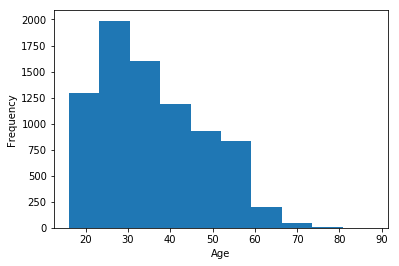

In [60]:
age_df = df["AGE"].dropna()
age_df.plot.hist()
plt.xlabel("Age")

In [37]:
df3 = df[df['AGE'] < 18]
df3.head()

,INMATE_ID,CUSTODY_LEVEL,MENTAL_OBSERVATION,RACE,GENDER,AGE,INMATE_STATUS_CODE,GANG_AFFILIATION,TOP_CHARGE,INFRACTION,YEAR,MONTH,DAY,HOUR
184,20186674,MAX,N,B,M,17.0,DE,Y,160.15,Y,2017,9,8,13
501,20180140,MAX,Y,O,M,17.0,DE,Y,120.10,Y,2017,3,28,1
1190,20191841,MAX,Y,B,M,17.0,DE,N,110-125.25,Y,2018,2,3,2
1236,20183832,MAX,Y,O,M,17.0,DE,Y,160.10,Y,2018,3,12,11
1336,20187343,MAX,Y,B,M,17.0,DE,Y,160.15,Y,2018,2,28,17


In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 184 to 8035
Data columns (total 14 columns):
INMATE_ID             87 non-null int64
CUSTODY_LEVEL         87 non-null object
MENTAL_OBSERVATION    87 non-null object
RACE                  87 non-null object
GENDER                87 non-null object
AGE                   87 non-null float64
INMATE_STATUS_CODE    87 non-null object
GANG_AFFILIATION      87 non-null object
TOP_CHARGE            85 non-null object
INFRACTION            87 non-null object
YEAR                  87 non-null int64
MONTH                 87 non-null int64
DAY                   87 non-null int64
HOUR                  87 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 10.2+ KB


Text(0.5,1,'Level of Security of 16-17 YO Prisoners by Gender')

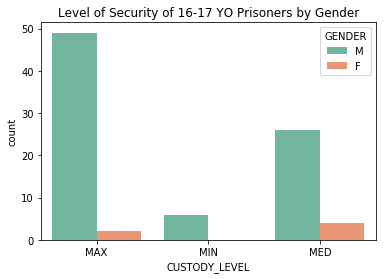

In [65]:
sns.countplot(x = 'CUSTODY_LEVEL', hue = 'GENDER', data = df3, palette="Set2")
plt.title('Level of Security of 16-17 YO Prisoners by Gender')

Text(0.5,1,'Gang Affiliation of 16-17 YO Prisoners by Gender')

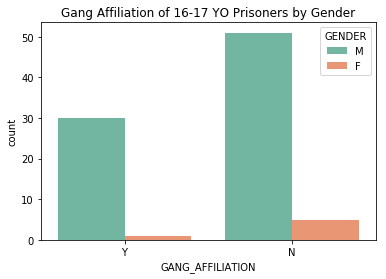

In [57]:
sns.countplot(x = 'GANG_AFFILIATION', hue = 'GENDER', data = df3, palette="Set2")
plt.title('Gang Affiliation of 16-17 YO Prisoners by Gender')

A majority of the 16-17 year olds are placed in maximum security custody levels! However we can see, thankfully, that a majority of them do not have gang affiliations at the time of their incarceration using the yscale. However the proportions are larger than tha of the adults.

In [39]:
df3['TOP_CHARGE'].value_counts().head(10)

160.15        23
160.10        15
110-125.25    12
265.03         7
125.25         6
105.15         4
140.25         3
120.00         2
110-160.15     2
110-160.10     1
Name: TOP_CHARGE, dtype: int64

The most frequent charges for 16-17 year olds is as follows:

- 160.15 is 'Robbery in the first degree'.
- 160.10 is 'Robbery in the second degree'.
- 110-125.25, if treated as a range, is 'Attempt to commit a crime' to 'Murder in the first degree'. No singular offense was found for this charge.
- 265.03 is 'Criminal possession of a weapon in the second degree'.
- 125.25 is 'Murder in the second degree'.
- 105.15 is 'Conspiracy in the second degree'.
- 140.25 is 'Burglary in the second degree'.
- 120.00 is 'Assault in the third degree'.
- 110-160.15, if treated as a range, is 'Attempt to commit a crime' to 'Robbery in the first degree'. No singular offense was found for this charge.
- 110-160.10, if treated as a range, is 'Attempt to commit a crime' to 'Robbery in the second degree'. No singular offense was found for this charge. 

Five of these top ten most frequent charges involve theft or the intent to commit theft.

Now that we've explored age and gender, let's take a look at race.

Text(0,0.5,'Number of Inmates')

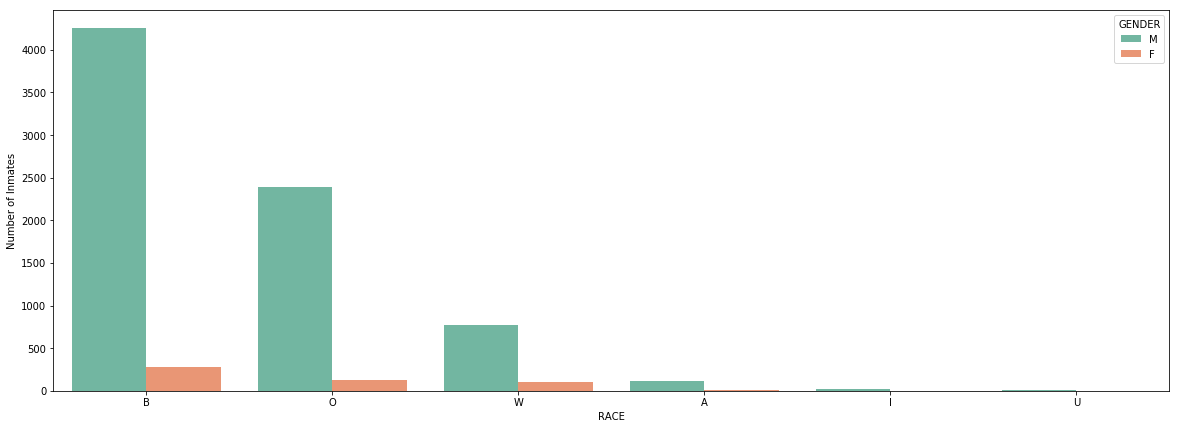

In [67]:
plt.figure(figsize=(20,7))
sns.countplot(x='RACE', hue='GENDER', data=df, palette="Set2")
plt.ylabel("Number of Inmates")

Text(0,0.5,'Number of Inmates')

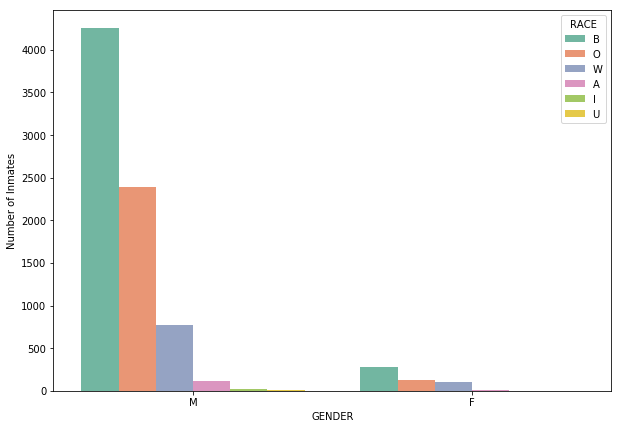

In [68]:
plt.figure(figsize=(10,7))
sns.countplot(x='GENDER', hue='RACE', data=df, palette="Set2")
plt.ylabel("Number of Inmates")

These two graphs present the SAME INFORMATION but in two different visualizations.

Text(0,0.5,'Number of Inmates')

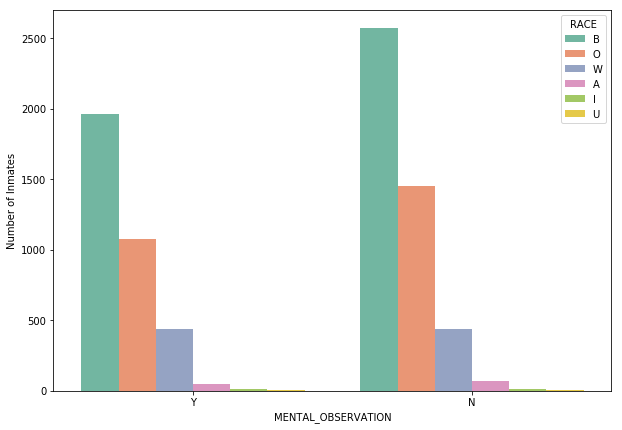

In [78]:
plt.figure(figsize=(10,7))
sns.countplot(x='MENTAL_OBSERVATION', hue='RACE', data=df, palette="Set2")
plt.ylabel("Number of Inmates")

Text(0,0.5,'Number of Inmates')

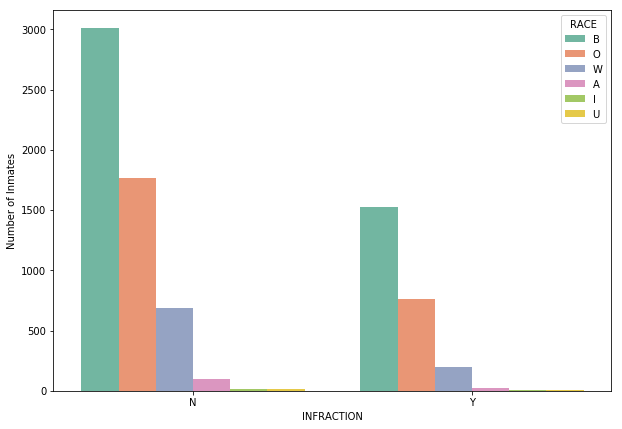

In [79]:
plt.figure(figsize=(10,7))
sns.countplot(x='INFRACTION', hue='RACE', data=df, palette="Set2")
plt.ylabel("Number of Inmates")